# Data Exploratory Aanlysis
Exploratory Data Analysis (EDA) is a vital process involving initial inquiries into data to uncover patterns and validate assumptions, employing summary statistics and graphical representations.

EDA proves valuable for scrutinizing outliers, identifying patterns, and discerning trends within the provided data. Its utility extends to revealing significant patterns, offering profound insights into datasets to address business challenges effectively. Additionally, EDA serves as a guiding factor in addressing missing values by providing cues for imputation within the dataset.








# Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import random as rnd


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


# for warnings 
import warnings
warnings.filterwarnings('ignore')

In [5]:
!pip install xlrd>=2.0.1


In [6]:
data=pd.read_excel(r"D:\DATA SCIENTIST EXAMS\IBAC EXAM\IABAC\data\raw\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

In [7]:
# To see the first five data
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [8]:
# To see the last five data
data.tail()

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
1195   E100992   27  Female             Medical      Divorced         Sales   
1196   E100993   37    Male       Life Sciences        Single   Development   
1197   E100994   50    Male             Medical       Married   Development   
1198   E100995   34  Female             Medical        Single  Data Science   
1199   E100998   24  Female       Life Sciences        Single         Sales   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
1195   Sales Executive       Travel_Frequently                 3   
1196  Senior Developer           Travel_Rarely                10   
1197  Senior Developer           Travel_Rarely                28   
1198    Data Scientist           Travel_Rarely                 9   
1199   Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
1195                  1  ...                            2   
1196                  2  ...                            1   
1197                  1  ...                            3   
1198                  3  ...                            2   
1199                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
1195                             6                             5   
1196                             1                             0   
1197                            20                             8   
1198                             8                             7   
1199                             2                             2   

     YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
1195                       0                     4         No   
1196                       0                     0         No   
1197                       3                     8         No   
1198                       7                     7         No   
1199                       2                     0        Yes   

      PerformanceRating  
1195                  4  
1196                  3  
1197                  3  
1198                  3  
1199                  2  

[5 rows x 28 columns]

##  Exploratory Data Analysis


## * Univariate Analysis

In [9]:
# Separate categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(exclude=['object']).columns

# Print the identified columns
print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)


Categorical Columns:
Index(['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition'],
      dtype='object')

Numerical Columns:
Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')


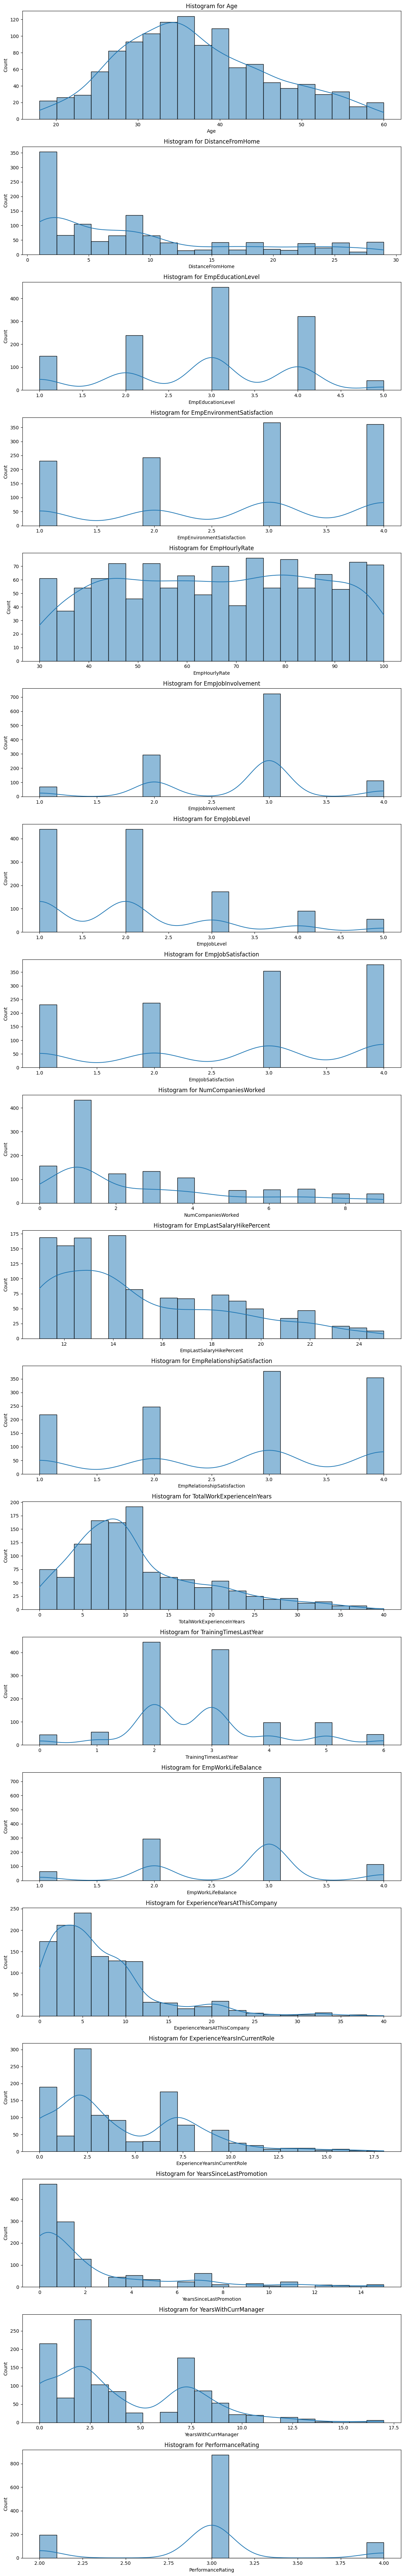

In [10]:
# plotting histplots for numerical columns
numerical_columns = data.select_dtypes(include='number').columns
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(12, 4 * len(numerical_columns)))

for col, ax in zip(numerical_columns, axes):
    sns.histplot(data[col], bins=20, kde=True, ax=ax)
    ax.set_title(f'Histogram for {col}')

plt.tight_layout()
plt.show()

HistPlot:
Seaborn's histplot function is employed for visualizing histograms, offering a concise representation of the distribution of either continuous or discrete variables. These plots illustrate the frequency or count of data points within predefined bins or intervals, aiding in a clearer understanding of the data's overall pattern.

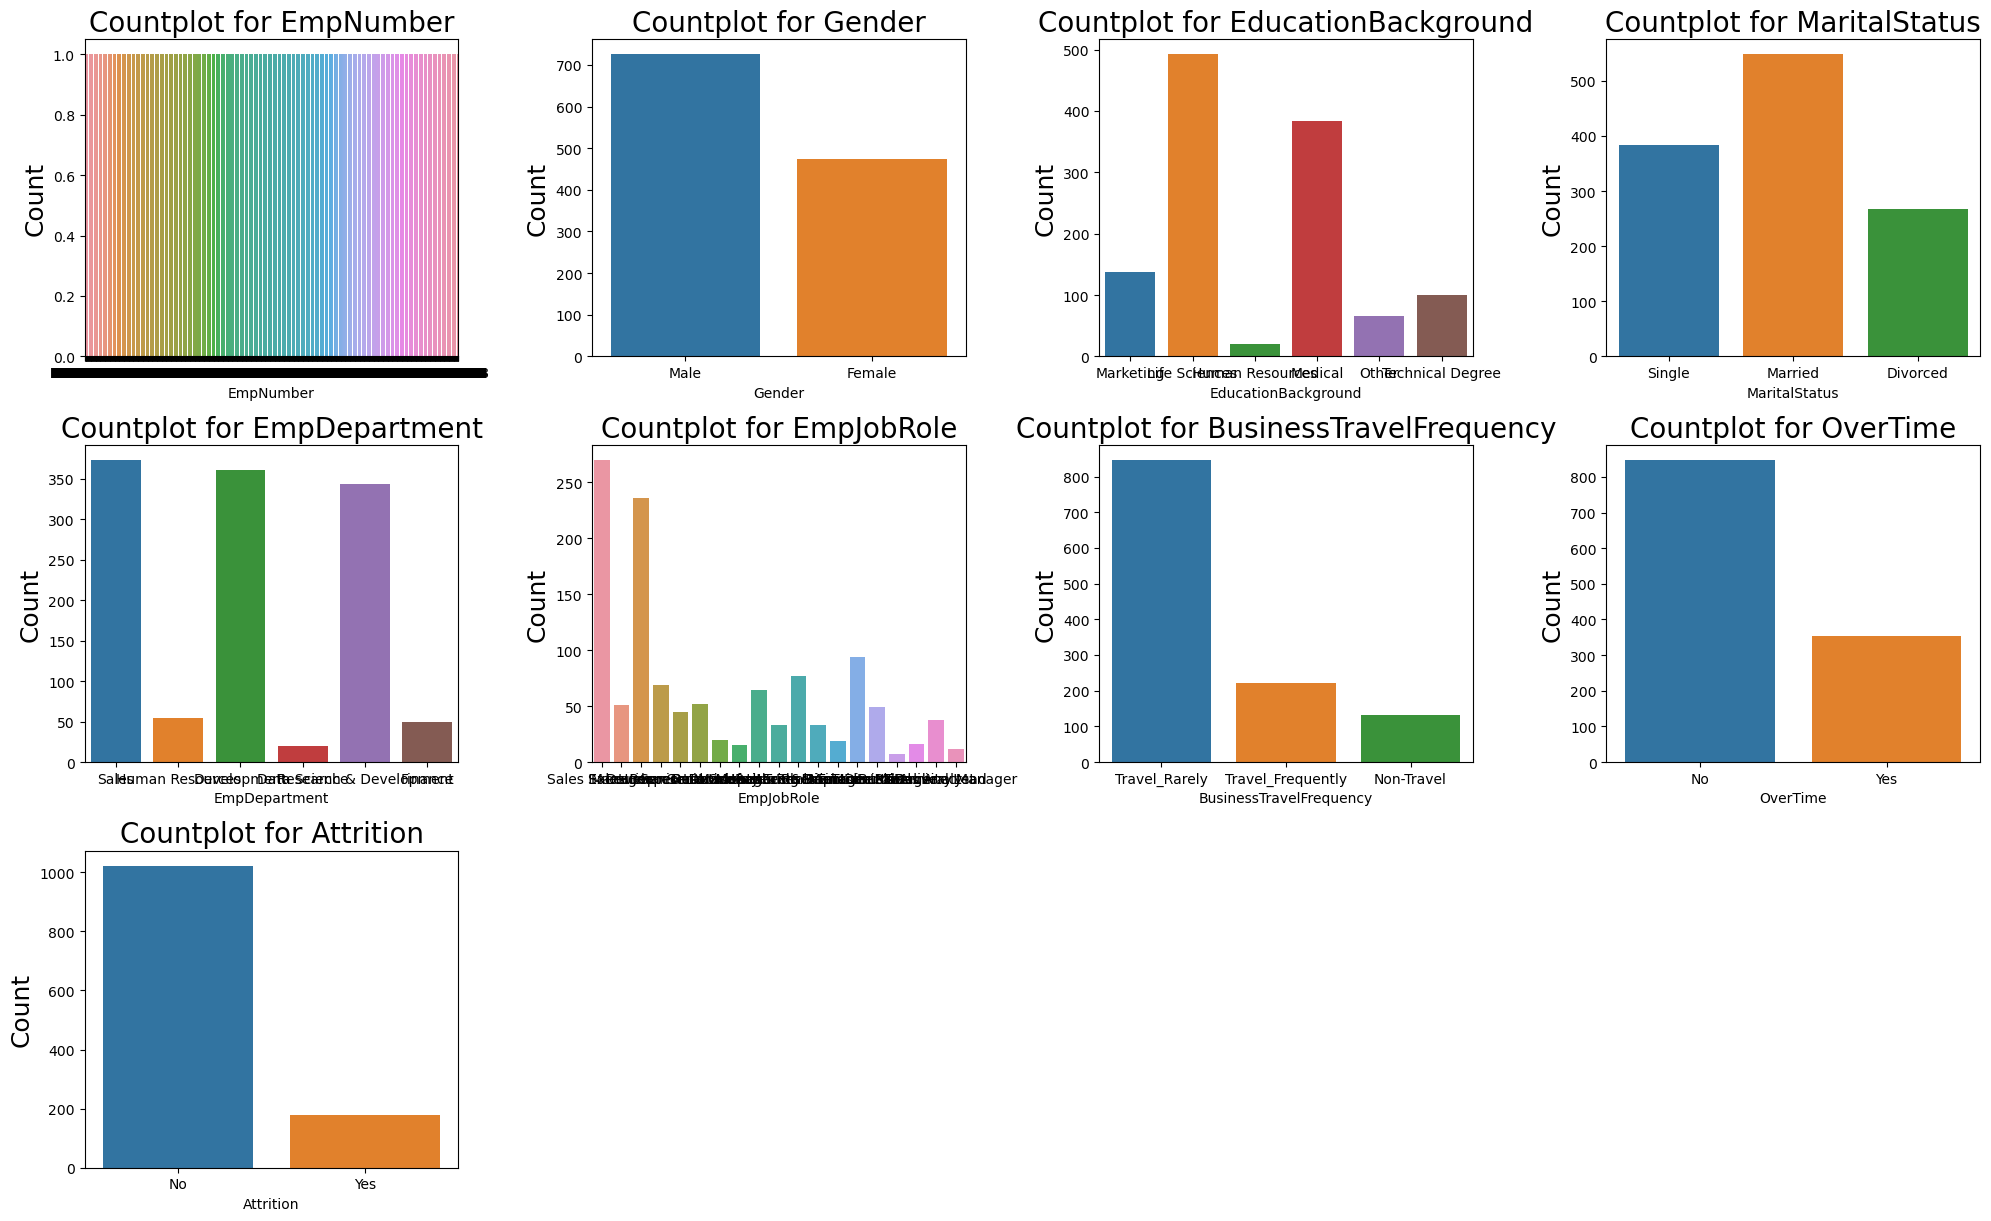

In [7]:
## Countplot for categorical columns
plt.figure(figsize=(20, 20))

for i, feature in enumerate(categorical_columns):
    plt.subplot(5, 4, i+1)
    sns.countplot(x=feature, data=data)
    plt.title(f"Countplot for {feature}", fontsize=20)  # Adjust the fontsize as needed
    plt.ylabel("Count", fontsize=18)  # Adjust the fontsize as needed

plt.tight_layout()
plt.show()

### Insights: 
**1.Gender Distribution:**

The gender distribution in the company is characterized by approximately 60% male employees and 40% female employees.
Educational Backgrounds:

Employees exhibit diversity in educational backgrounds, with six unique backgrounds represented in the workforce.

**2.Job Roles:**

The company boasts a workforce with a diverse range of talents, featuring nineteen unique job roles among its employees.

**3.Educational Levels:**

A significant proportion of employees (majority) hold an education level of 3.

**4.Job Satisfaction:**

The majority of employees express a high level of job satisfaction, reflecting positive sentiments within the company.

**5.Attrition Rate:**

A substantial 85% of employees report no attrition in their work, indicating stability and satisfaction in their roles.

**6.Performance Ratings:**

Only a modest 11% of employees have achieved a performance rating at level 4, suggesting room for improvement or a selective recognition system.

**7.Overtime Engagement:**

Approximately 30% of employees engage in overtime work, contributing to a comprehensive understanding of the workforce's dedication and workload distribution.







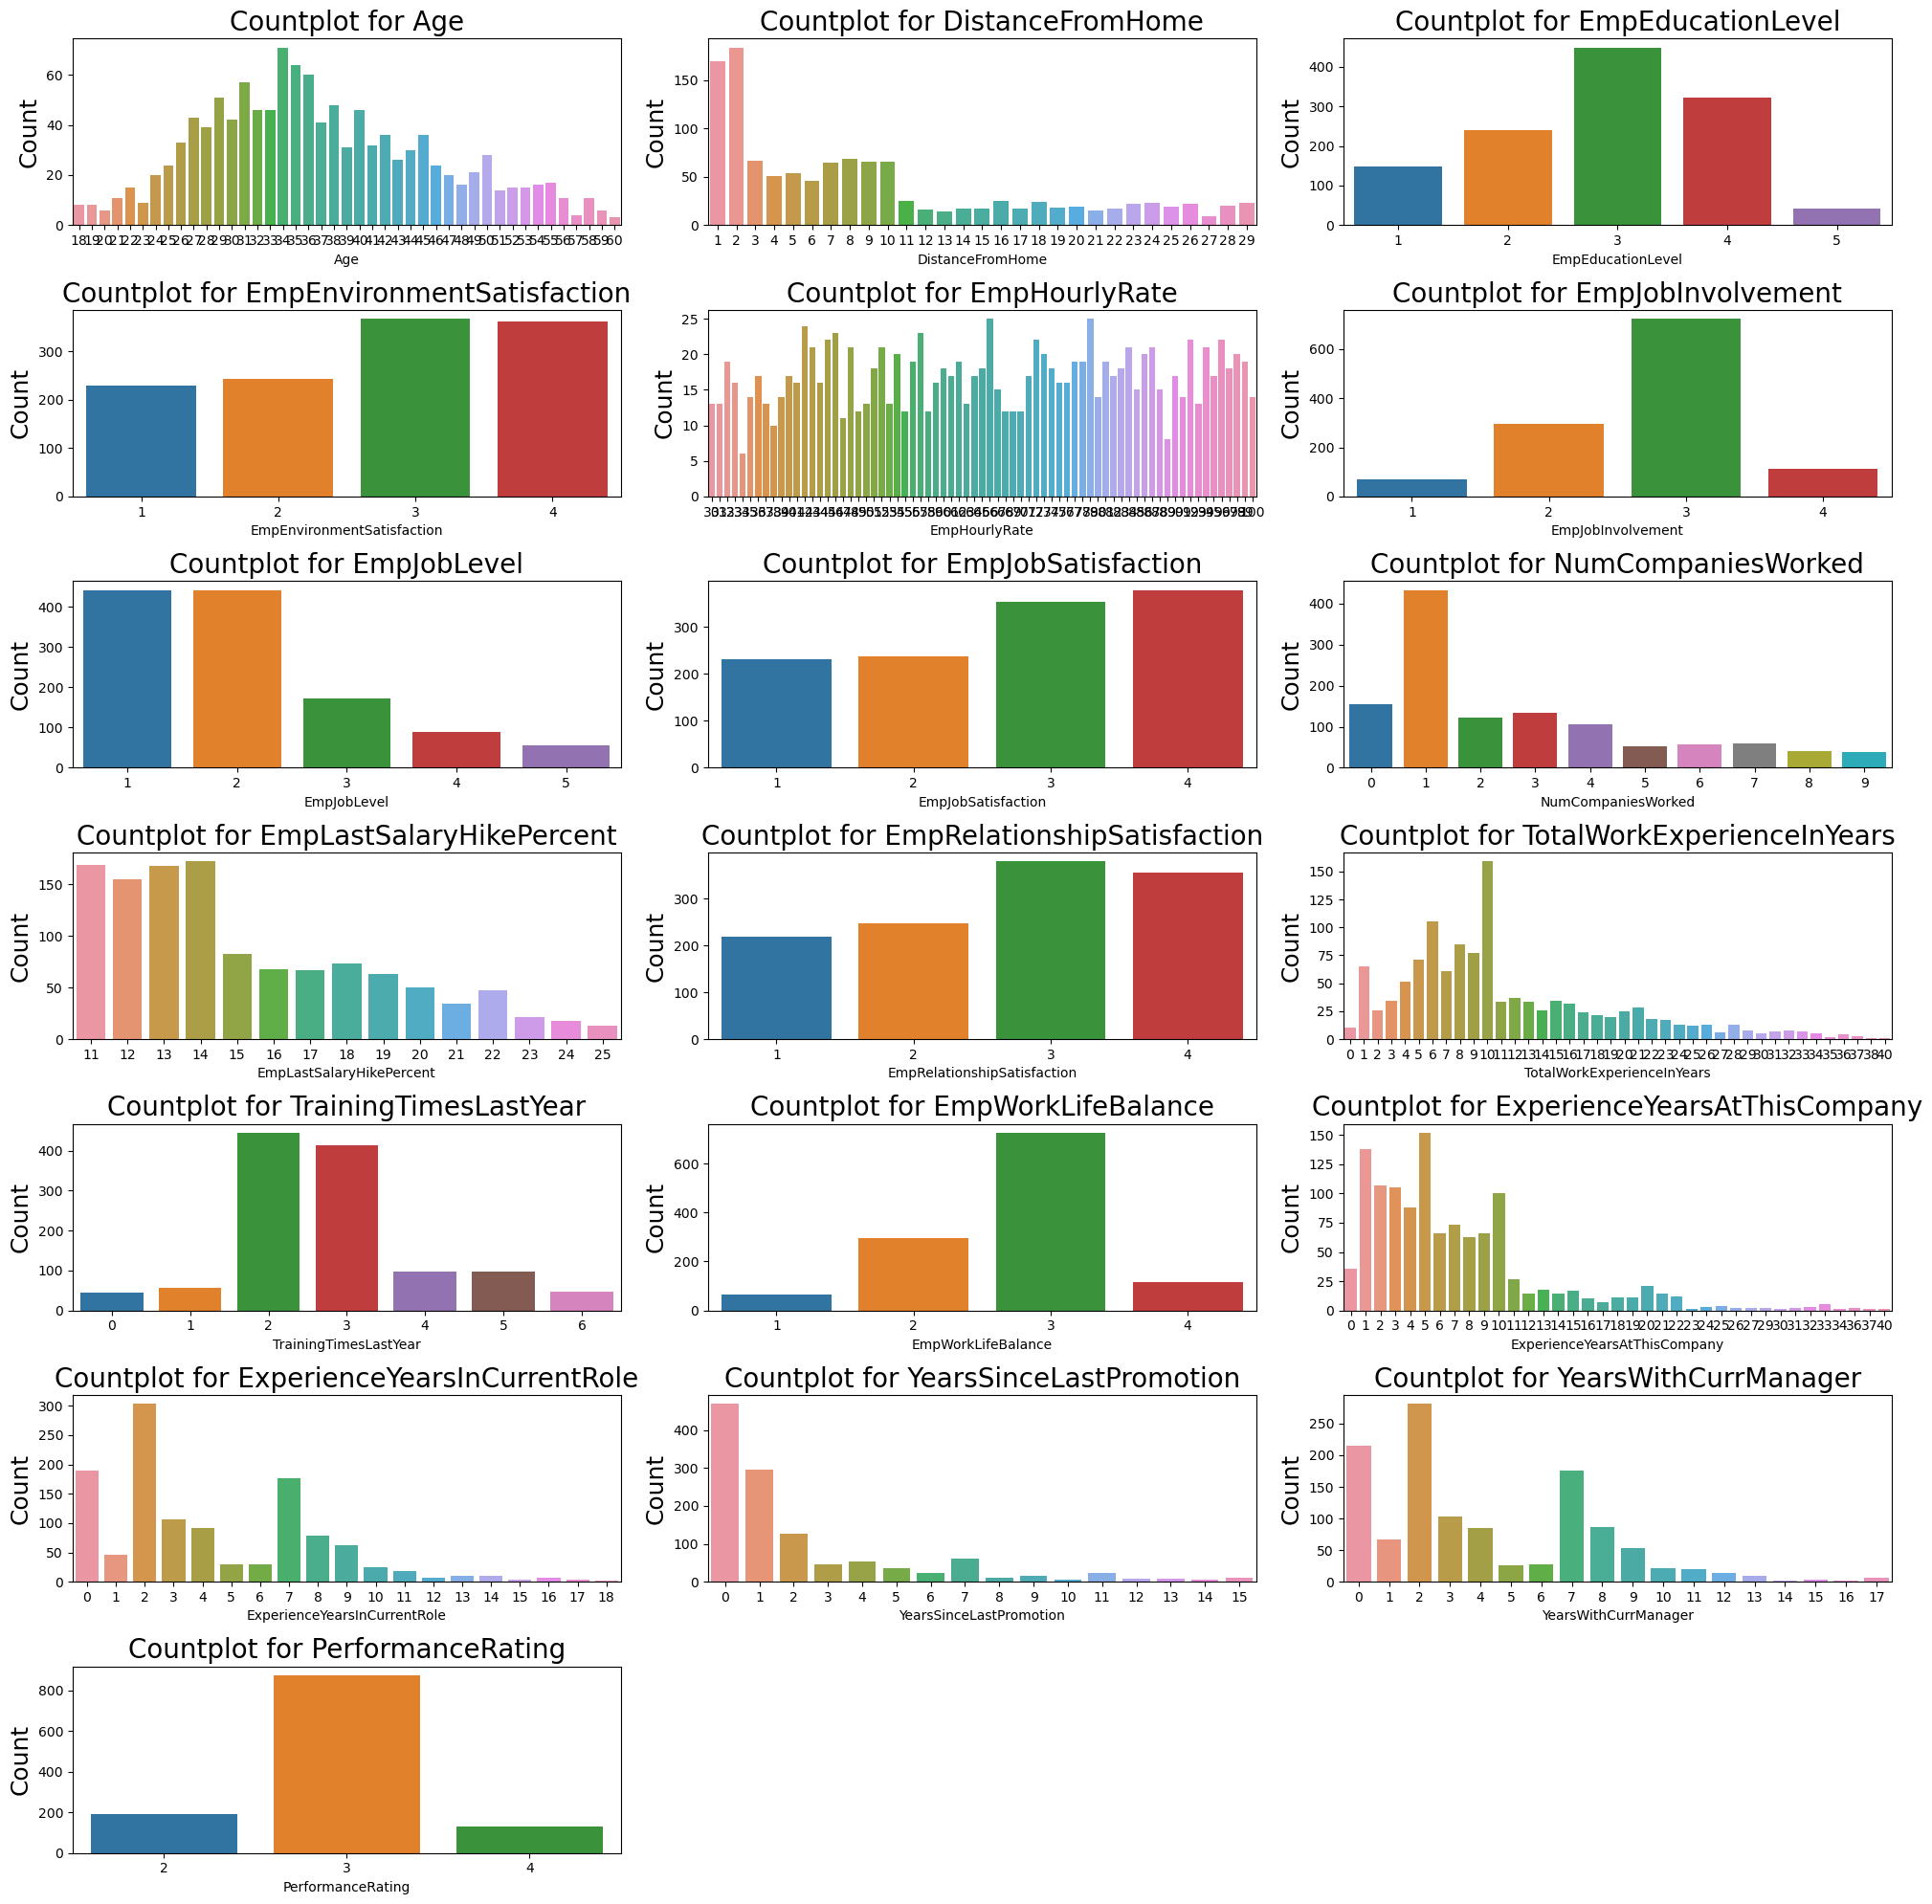

In [8]:
plt.figure(figsize=(20, 20))

for i, feature in enumerate(numerical_columns):
    plt.subplot(7, 3, i+1)
    sns.countplot(x=feature, data=data)
    plt.title(f"Countplot for {feature}", fontsize=20)  # Adjust the fontsize as needed
    plt.ylabel("Count", fontsize=18)  # Adjust the fontsize as needed
 

plt.tight_layout()
plt.show()

### Insights: 
**1. Age Distribution:**

The age distribution spans from 18 to 60, with a concentration of employees falling between the ages of 30 to 40.

**2.Distance from Home to Office:**

The distance from home to the office varies from 0 to 30 units (kilometers or miles). A significant number of employees commute within the range of 0 to 5 units.

**3.Previous Work Experience:**

Employees bring diverse work experiences, having worked in up to 8 companies. The prevalent trend is that most employees have experience in up to 2 companies before joining the current workplace.

**4.Hourly Rate:**

The majority of employees in this company have hourly rates ranging from 65 to 95.

**5.Tenure in the Company:**

Generally, most employees have a tenure of up to 5 years in this company, providing insight into the workforce's average length of service.

**6.Salary Hike Percentage:**

A predominant number of employees receive a salary hike in the range of 11% to 15%, shedding light on the prevailing trend in salary adjustments within the company.







## * Bivarient Ananlysis

<Axes: xlabel='EducationBackground', ylabel='PerformanceRating'>

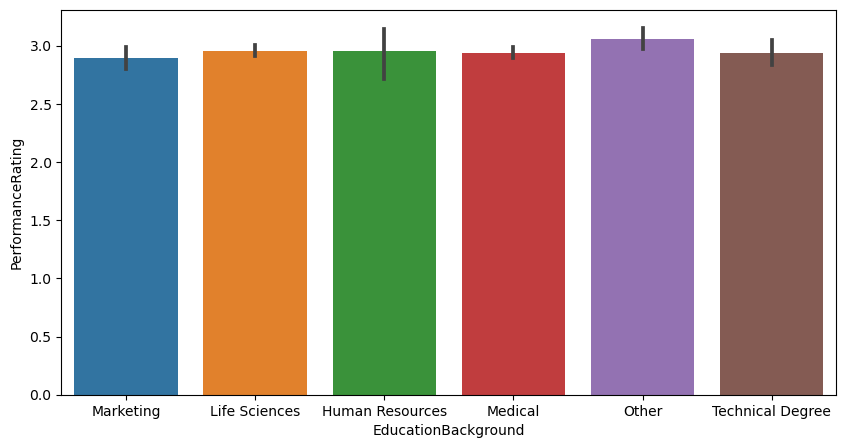

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(x="EducationBackground",y="PerformanceRating",data=data)

### Insights
Others have higest Performance Rating and Marketing has lowest Rating.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Sales'),
  Text(1, 0, 'Human Resources'),
  Text(2, 0, 'Development'),
  Text(3, 0, 'Data Science'),
  Text(4, 0, 'Research & Development'),
  Text(5, 0, 'Finance')])

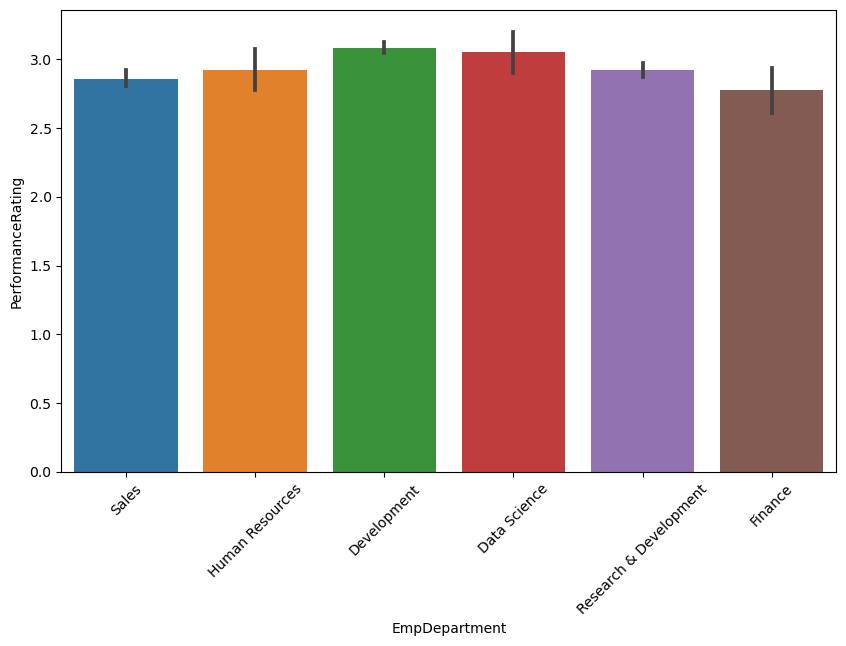

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x="EmpDepartment",y="PerformanceRating",data=data)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Manager'),
  Text(2, 0, 'Developer'),
  Text(3, 0, 'Sales Representative'),
  Text(4, 0, 'Human Resources'),
  Text(5, 0, 'Senior Developer'),
  Text(6, 0, 'Data Scientist'),
  Text(7, 0, 'Senior Manager R&D'),
  Text(8, 0, 'Laboratory Technician'),
  Text(9, 0, 'Manufacturing Director'),
  Text(10, 0, 'Research Scientist'),
  Text(11, 0, 'Healthcare Representative'),
  Text(12, 0, 'Research Director'),
  Text(13, 0, 'Manager R&D'),
  Text(14, 0, 'Finance Manager'),
  Text(15, 0, 'Technical Architect'),
  Text(16, 0, 'Business Analyst'),
  Text(17, 0, 'Technical Lead'),
  Text(18, 0, 'Delivery Manager')])

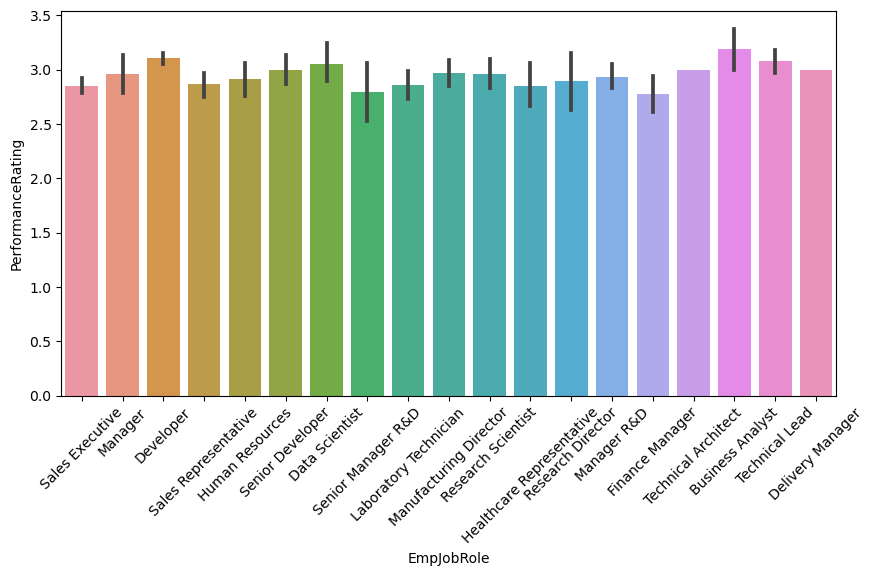

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x="EmpJobRole",y="PerformanceRating",data=data)
plt.xticks(rotation=45)

### Insights:
Technical Architect has highest rating(3.3) & Manager R$D has lowest rating(2.6)

<Axes: xlabel='EmpEducationLevel', ylabel='PerformanceRating'>

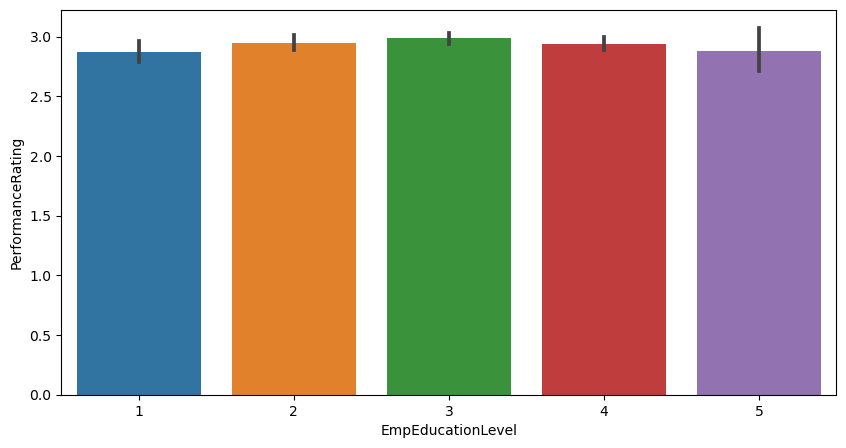

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(x="EmpEducationLevel",y="PerformanceRating",data=data)

### Insights
1.'Below College'

2.'College'

3.'Bachelor'

4.'Master'

5.'Doctor'

6.'Bachelor' has highest performance rating

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]),
 [Text(0, 0, '30'),
  Text(1, 0, '31'),
  Text(2, 0, '32'),
  Text(3, 0, '33'),
  Text(4, 0, '34'),
  Text(5, 0, '35'),
  Text(6, 0, '36'),
  Text(7, 0, '37'),
  Text(8, 0, '38'),
  Text(9, 0, '39'),
  Text(10, 0, '40'),
  Text(11, 0, '41'),
  Text(12, 0, '42'),
  Text(13, 0, '43'),
  Text(14, 0, '44'),
  Text(15, 0, '45'),
  Text(16, 0, '46'),
  Text(17, 0, '47'),
  Text(18, 0, '48'),
  Text(19, 0, '49'),
  Text(20, 0, '50'),
  Text(21, 0, '51'),
  Text(22, 0, '52'),
  Text(23, 0, '53'),
  Text(24, 0, '54'),
  Text(25, 0, '55'),
  Text(26, 0, '56'),
  Text(27, 0, '57'),
  Text(28, 0, '58'),
  Text(29, 0, '59'),
  Text(30, 0, '60'),
  Text(31, 0, '61'),
  Text(32, 0

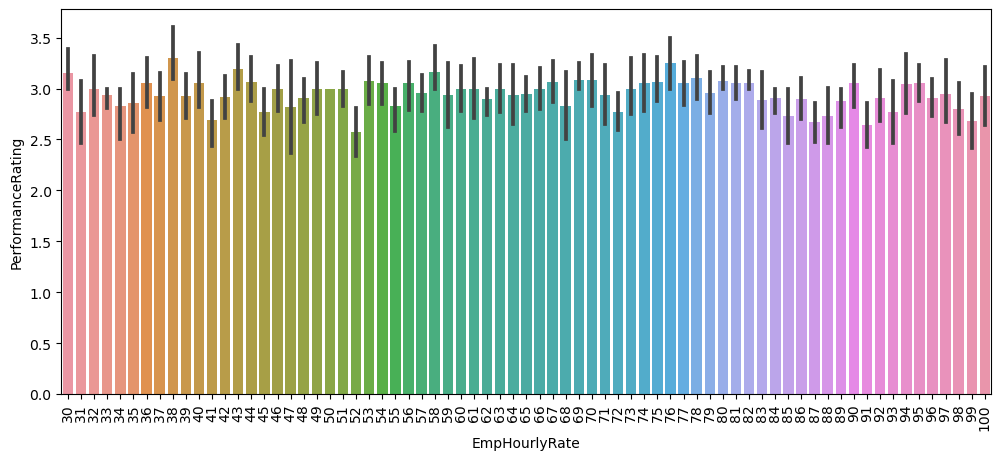

In [13]:
plt.figure(figsize=(12,5))
sns.barplot(x="EmpHourlyRate",y="PerformanceRating",data=data)
plt.xticks(rotation=90)

<Axes: xlabel='Attrition', ylabel='PerformanceRating'>

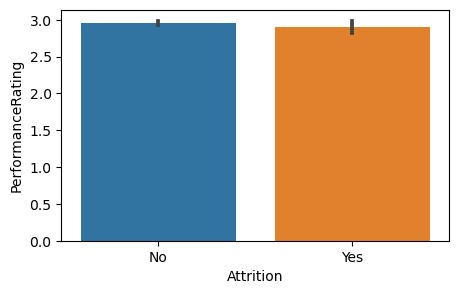

In [14]:
plt.figure(figsize=(5,3))
sns.barplot(x="Attrition",y="PerformanceRating",data=data)

### KDE Plots:
Suitable for visualizing the distribution of a single numerical variable or the relationship between a numerical variable and a categorical variable. Provide insights into the density and shape of the data distribution. May require fewer data points to visualize compared to scatter plots when dealing with densely populated data. Suitable for both numerical and categorical data.

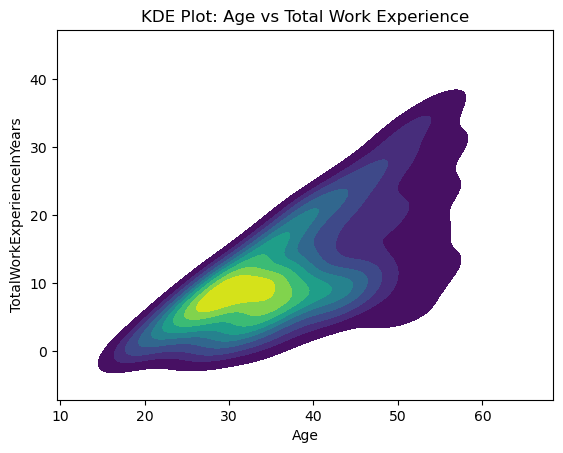

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KDE plot for the same data
sns.kdeplot(x='Age', y='TotalWorkExperienceInYears', data=data, cmap='viridis', shade=True)

# Add a title to the plot
plt.title('KDE Plot: Age vs Total Work Experience')

plt.show()


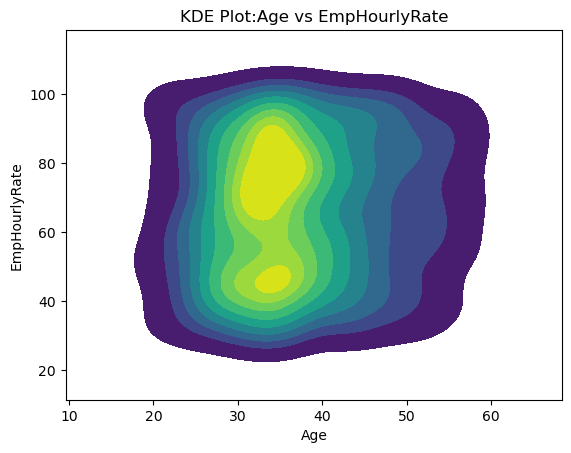

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KDE plot for the same data
sns.kdeplot(x='Age', y='EmpHourlyRate', data=data, cmap='viridis', shade=True)

# Add a title to the plot
plt.title('KDE Plot:Age vs EmpHourlyRate')

plt.show()


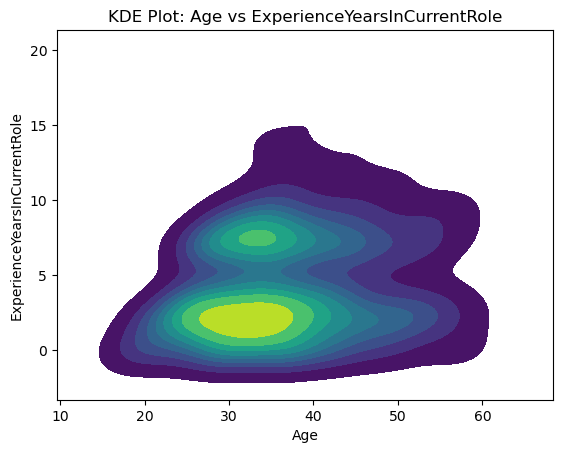

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KDE plot for the same data
sns.kdeplot(x='Age', y='ExperienceYearsInCurrentRole', data=data, cmap='viridis', shade=True)

# Add a title to the plot (with corrected string)
plt.title("KDE Plot: Age vs ExperienceYearsInCurrentRole")

plt.show()


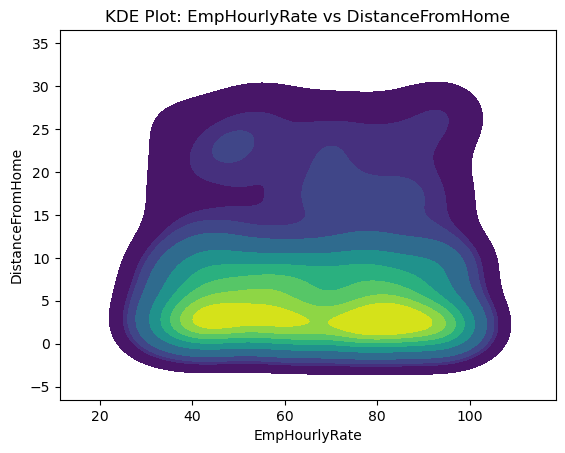

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KDE plot for the same data
sns.kdeplot(x='EmpHourlyRate', y='DistanceFromHome', data=data, cmap='viridis', shade=True)

# Add a title to the plot (with corrected string)
plt.title("KDE Plot: EmpHourlyRate vs DistanceFromHome")

plt.show()

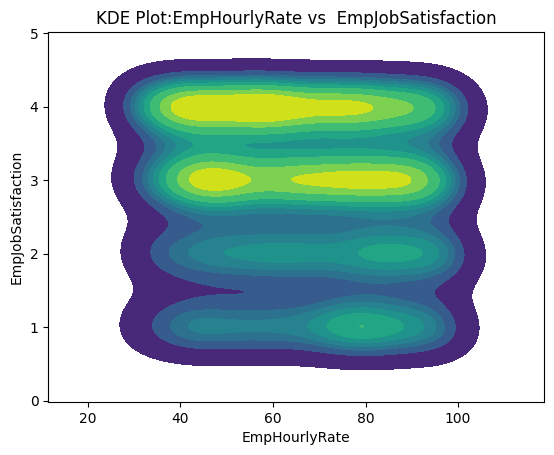

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KDE plot for the same data
sns.kdeplot(x='EmpHourlyRate', y='EmpJobSatisfaction', data=data, cmap='viridis', shade=True)

# Add a title to the plot (with corrected string)
plt.title("KDE Plot:EmpHourlyRate vs  EmpJobSatisfaction")

plt.show()

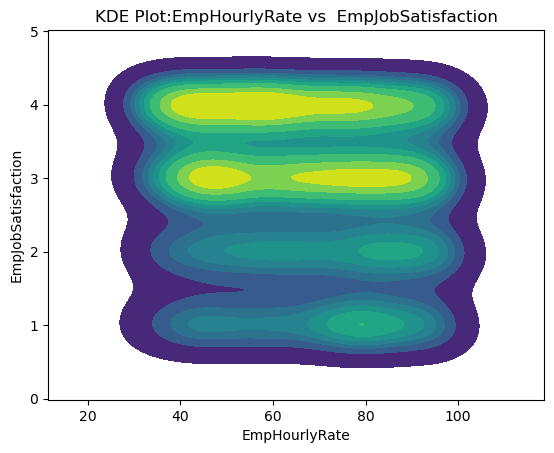

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KDE plot for the same data
sns.kdeplot(x='EmpHourlyRate', y='EmpJobSatisfaction', data=data, cmap='viridis', shade=True)

# Add a title to the plot (with corrected string)
plt.title("KDE Plot:EmpHourlyRate vs  EmpJobSatisfaction")

plt.show()

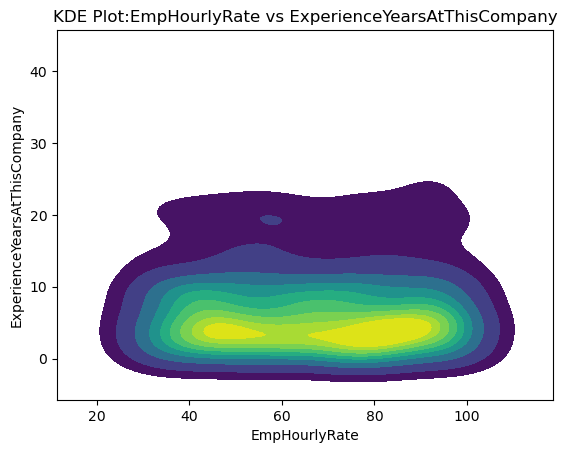

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KDE plot for the same data
sns.kdeplot(x='EmpHourlyRate', y='ExperienceYearsAtThisCompany', data=data, cmap='viridis', shade=True)

# Add a title to the plot (with corrected string)
plt.title("KDE Plot:EmpHourlyRate vs ExperienceYearsAtThisCompany")

plt.show()

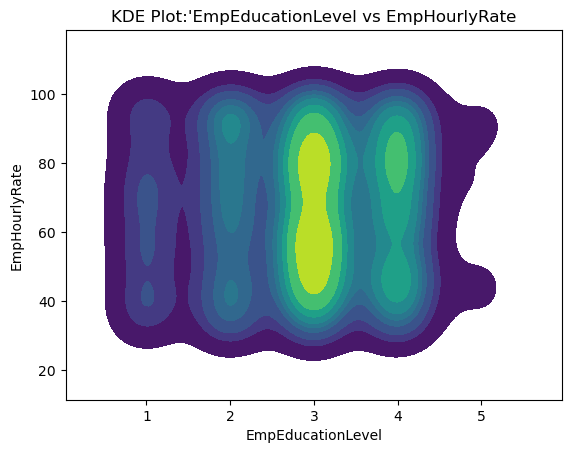

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KDE plot for the same data
sns.kdeplot(x='EmpEducationLevel', y='EmpHourlyRate', data=data, cmap='viridis', shade=True)

# Add a title to the plot (with corrected string)
plt.title("KDE Plot:'EmpEducationLevel vs EmpHourlyRate")

plt.show()

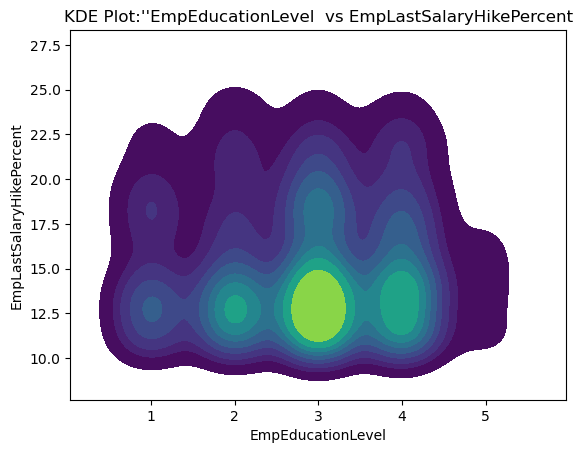

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KDE plot for the same data
sns.kdeplot(x='EmpEducationLevel', y='EmpLastSalaryHikePercent', data=data, cmap='viridis', shade=True)

# Add a title to the plot (with corrected string)
plt.title("KDE Plot:''EmpEducationLevel  vs EmpLastSalaryHikePercent")

plt.show()

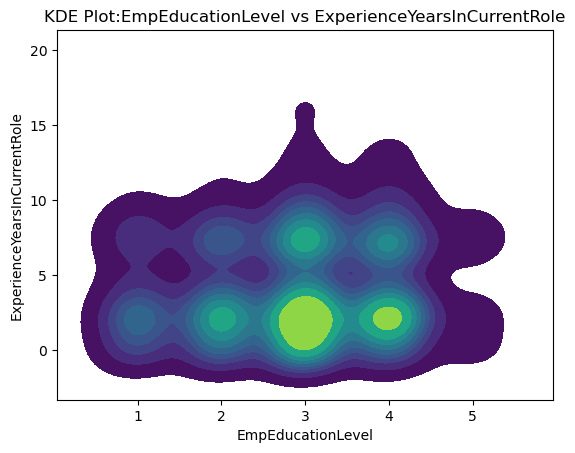

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KDE plot for the same data
sns.kdeplot(x='EmpEducationLevel', y='ExperienceYearsInCurrentRole', data=data, cmap='viridis', shade=True)

# Add a title to the plot (with corrected string)
plt.title("KDE Plot:EmpEducationLevel vs ExperienceYearsInCurrentRole")

plt.show()

## * MULTIVARIATE ANALYSIS

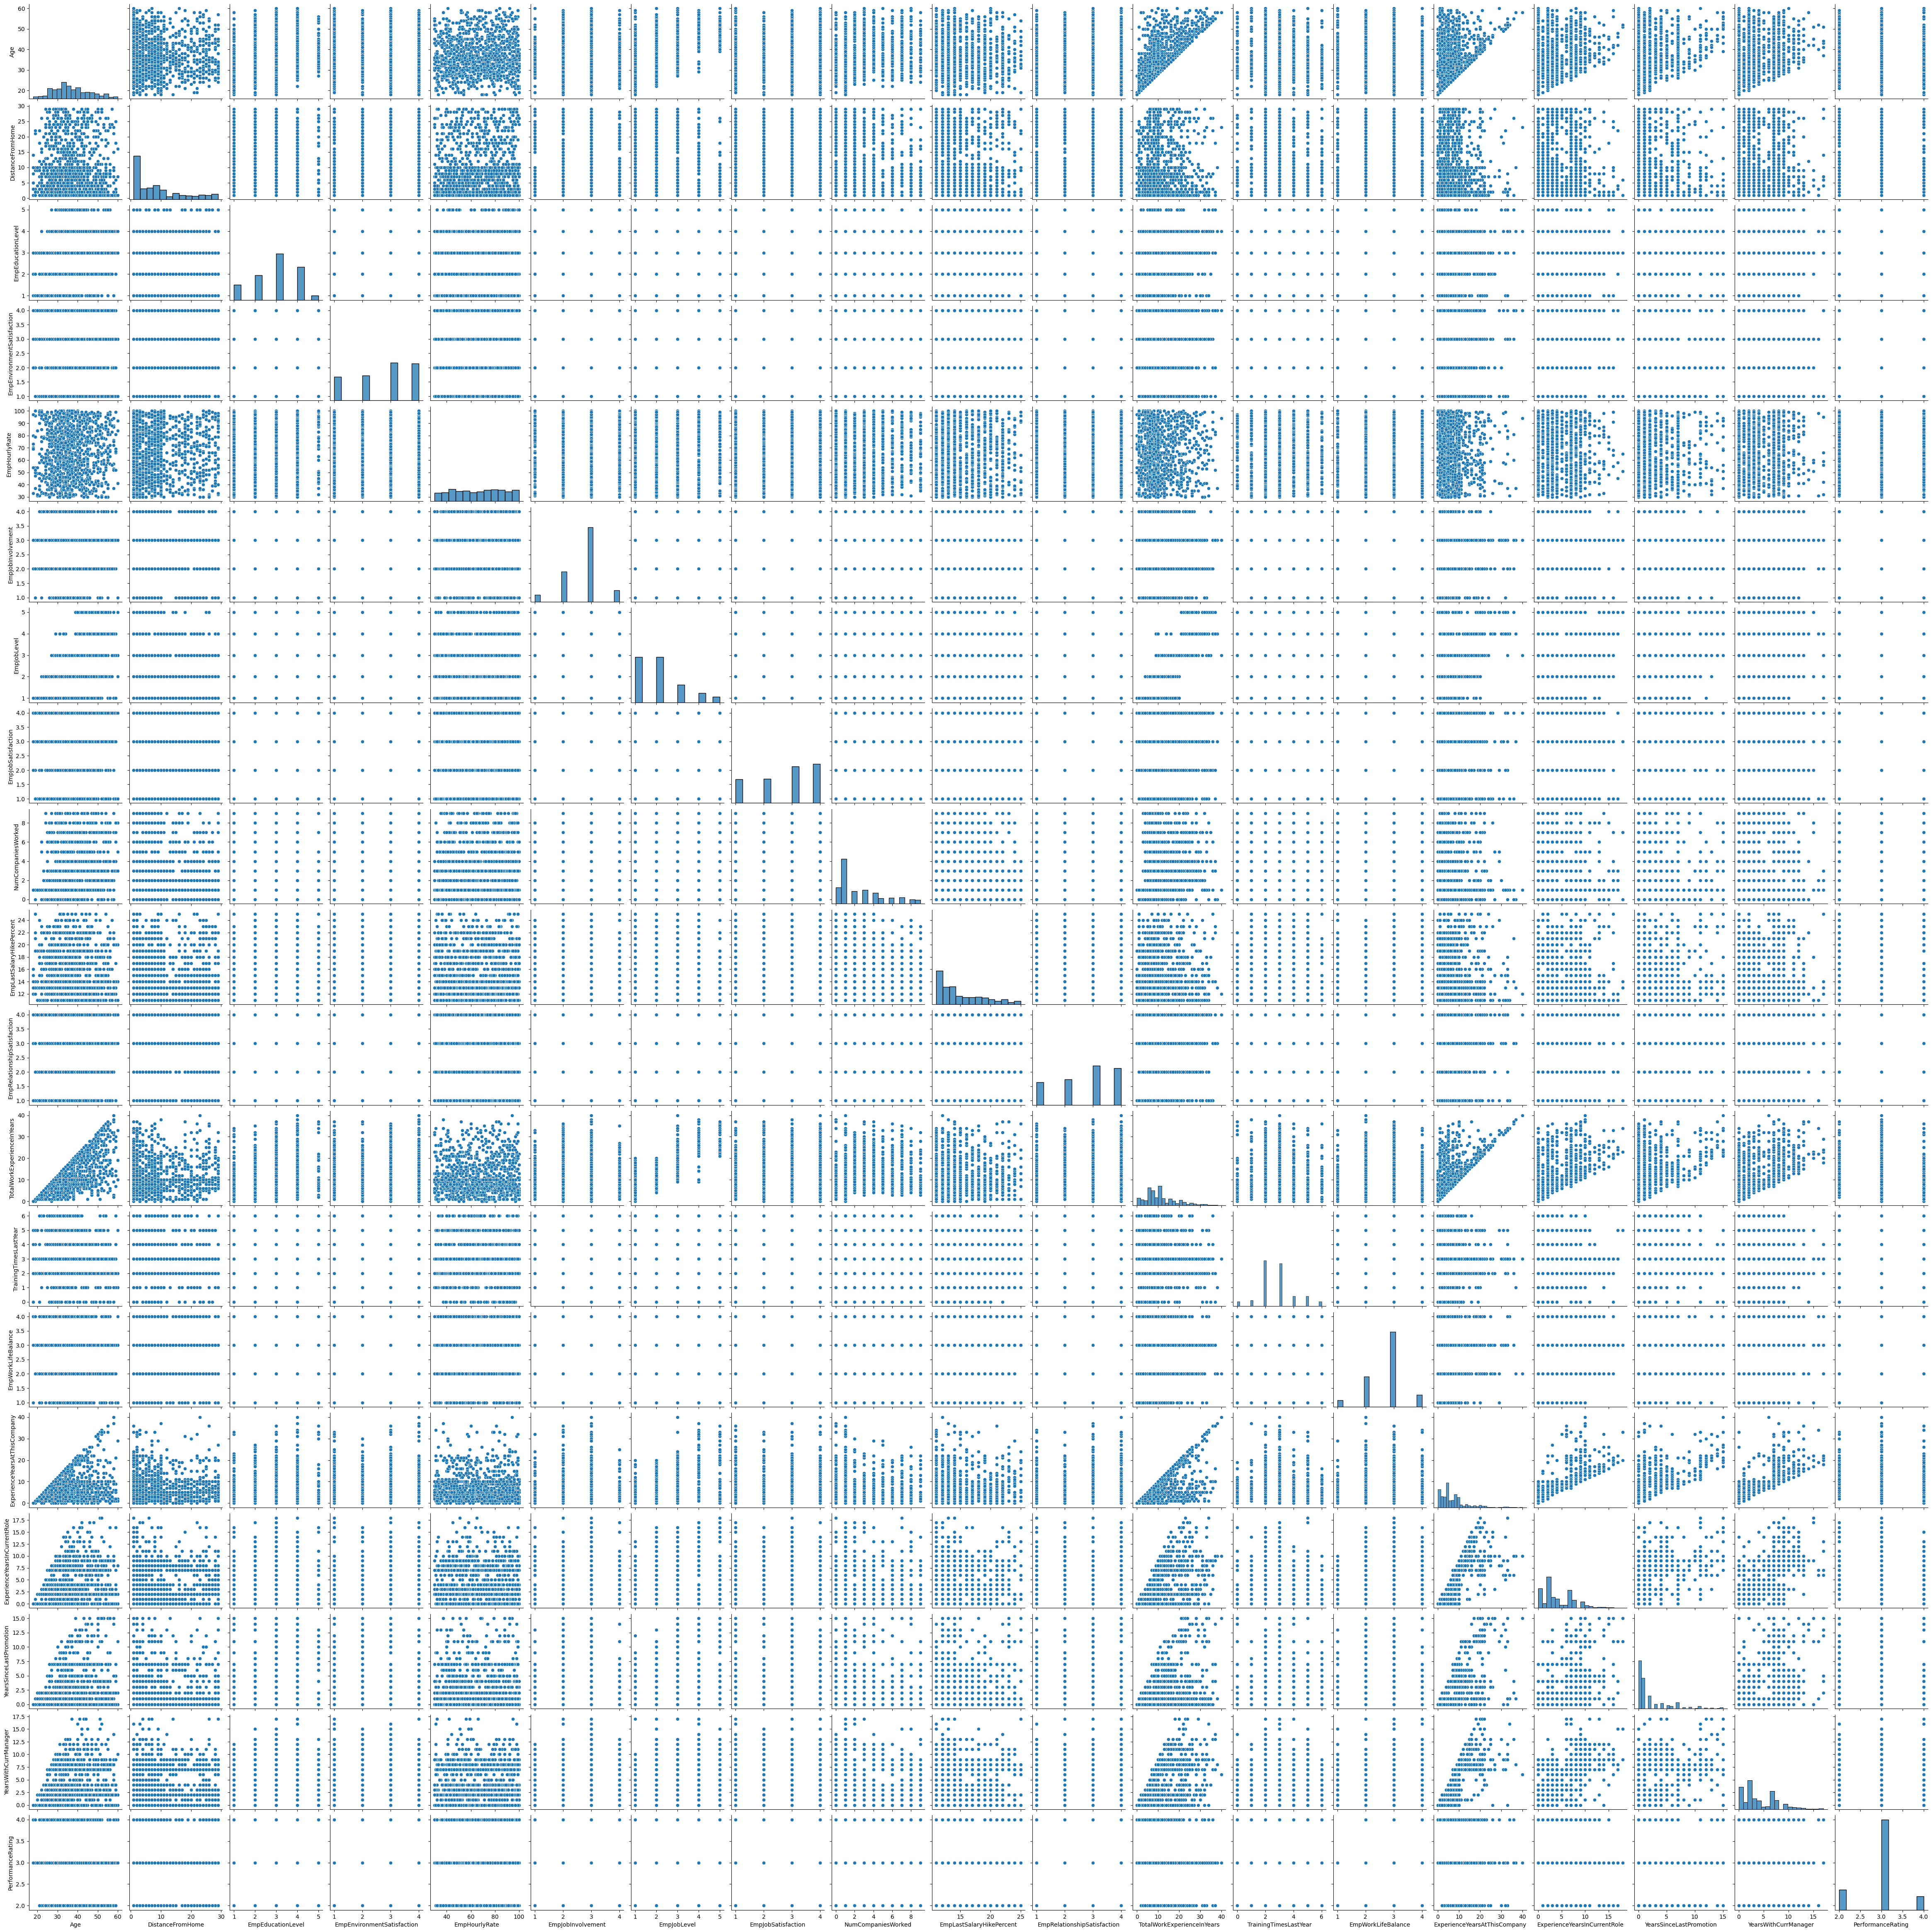

In [25]:
sns.pairplot(data=data)
plt.show()

### Department wise performance

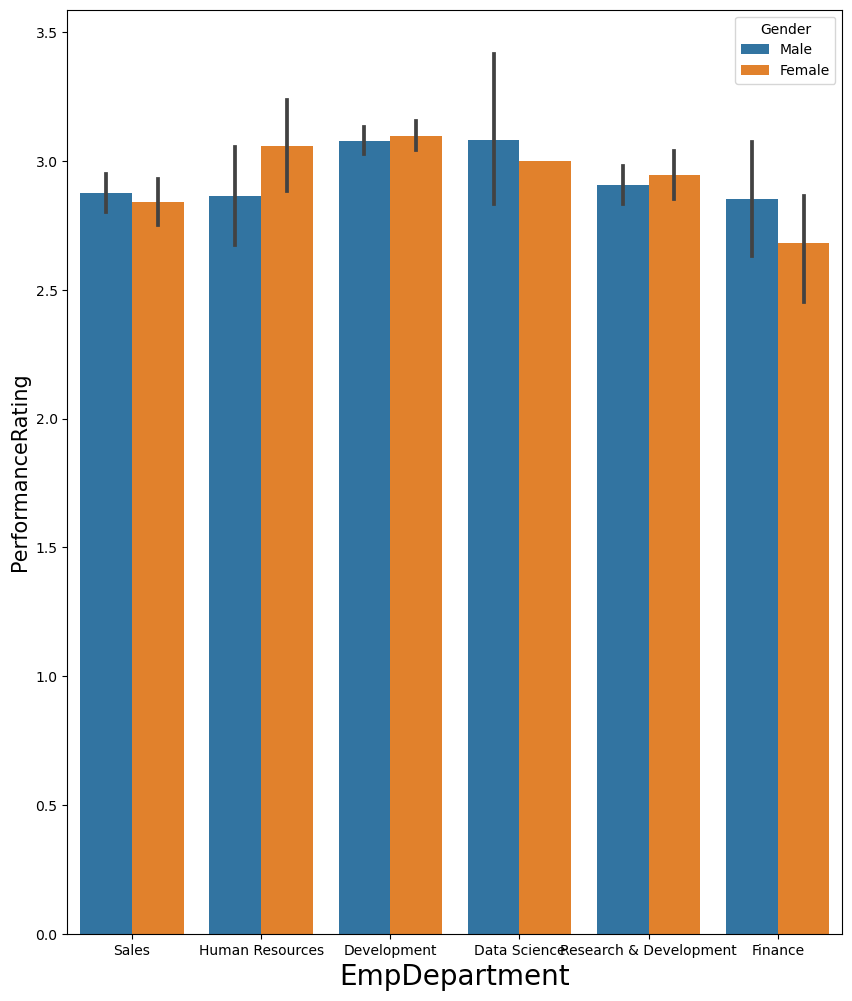

In [26]:
plt.figure(figsize=(10,12),facecolor='white')
sns.barplot(x='EmpDepartment',y='PerformanceRating',hue=data.Gender,data=data)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

### Insights:
**1.Sales Department:**

The sales department demonstrates an average performance rating of 2.8. Male employees outperform their female counterparts in this department.

**2.Human Resources:**

A majority of employees in Human Resources achieve a performance level of 3. Female employees in HR exhibit higher performance compared to their male counterparts.

**3.Development Department:**

The Development department boasts the highest employee performance level, with gender-wise performance equality across all employees.

**4.Data Science:**

Data Science follows with the second-highest performance rate. Male employees excel in this department, contributing to an overall strong performance.

**5.Research & Development:**

The Research & Development department exhibits commendable overall performance, with employees of all ages contributing efficiently.

**6.Finance:**

In Finance, performance tends to decrease with increasing age. Male employees perform well, and there's an inverse relationship between experience and performance levels.
These insights offer a department-specific perspective on employee performance, highlighting trends and variations across different functional areas within the organization.








## Heatmap

In [27]:
corr_matrix=data.corr()

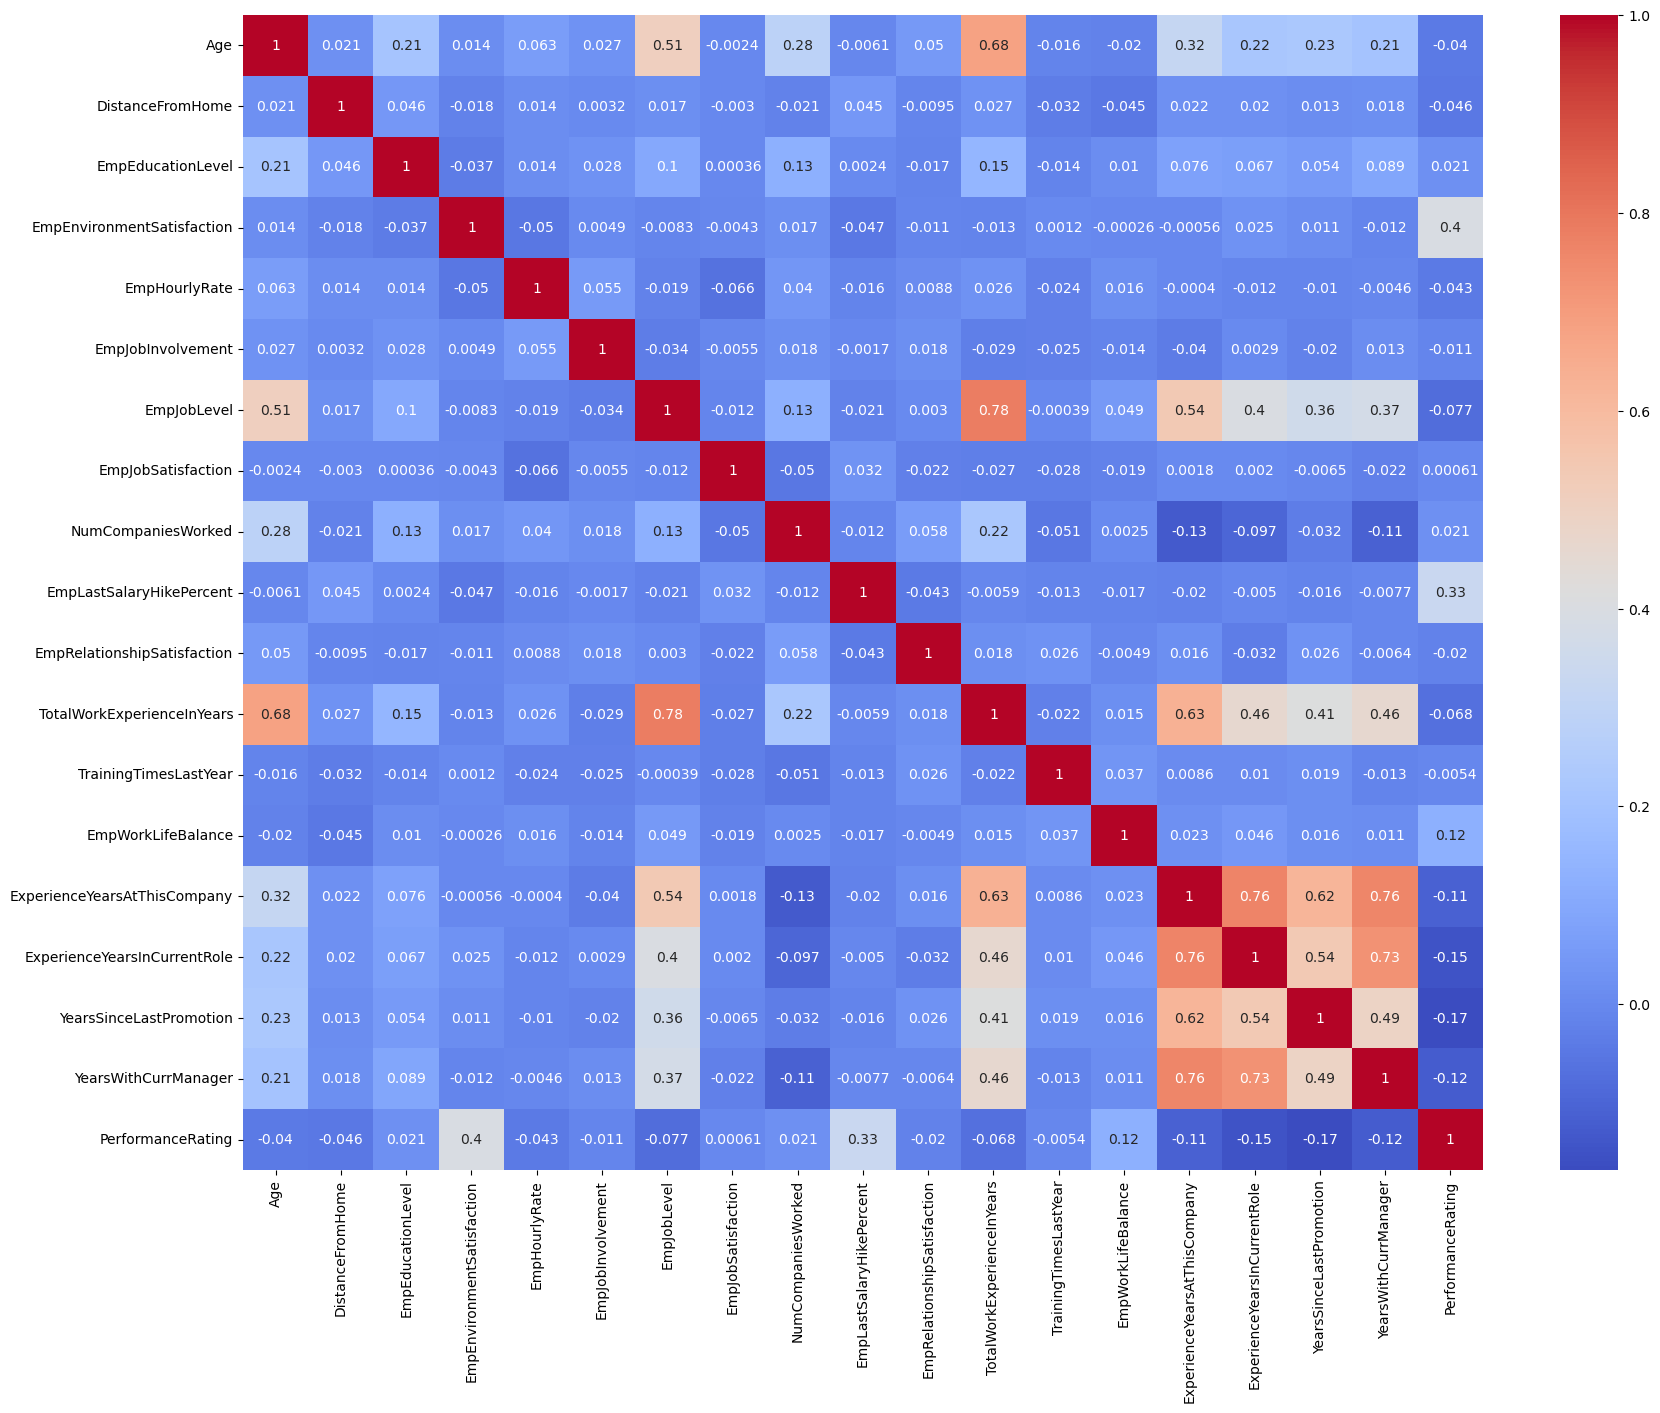

In [28]:
# Increase the figure size
plt.figure(figsize=(20, 15))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

### Insights:
**Age and Total Work Experience in Years:**

A robust positive correlation (0.68) between age and total work experience indicates that as employees age, they tend to accumulate more work experience.

**EmpJobLevel and TotalWorkExperienceInYears:**

A substantial positive correlation (0.78) between job level and total work experience highlights that employees with extensive work experience often attain higher job levels.

**EmpLastSalaryHikePercent and PerformanceRating:**

A moderate positive correlation (0.33) between the percentage of the last salary hike and performance rating suggests that employees receiving a higher salary increase tend to achieve higher performance ratings.

**EmpDepartment and EmpJobRole:**

A relatively strong positive correlation (0.57) between department and job role reveals that specific job roles are associated with particular departments.

**EmpEnvironmentSatisfaction and EmpJobSatisfaction:**

A positive correlation (0.39) between environmental satisfaction and job satisfaction indicates that employees content with their work environment are likely to be satisfied with their job.

**YearsWithCurrManager and ExperienceYearsInCurrentRole:**

A robust positive correlation (0.73) between the years with the current manager and years in the current role suggests that employees tend to have the same manager for an extended period in roles they've held for a longer time.

**Attrition and Age:**

A negative correlation (-0.19) between attrition and age implies that younger employees may be more inclined to leave the company.

**PerformanceRating and EmpEnvironmentSatisfaction:**

A relatively strong positive correlation (0.40) between performance rating and environmental satisfaction suggests that employees satisfied with their work environment may receive higher performance ratings.
These data-driven insights provide a comprehensive understanding of the relationships and trends within the employee dataset, offering valuable information for strategic decision-making.








In [29]:
## 3 top factors that affecting the performance of employees

In [30]:
# Find the correlations of PerformanceRating column
performance_correlations=corr_matrix['PerformanceRating'].sort_values(ascending=False)

In [31]:
# top 3 factors affecting employee performance
top_3_factors=performance_correlations[1:4] 
print("Top 3 Factors affecting employee performance:")
print(top_3_factors)

Top 3 Factors affecting employee performance:
EmpEnvironmentSatisfaction    0.395561
EmpLastSalaryHikePercent      0.333722
EmpWorkLifeBalance            0.124429
Name: PerformanceRating, dtype: float64


# Conclusion:
• EDA serves as a fundamental step in comprehensively examining and distilling key insights from our dataset.

• It provides a foundational understanding of the data, encompassing its distribution, the presence of null values, and other critical characteristics.

• The exploration can be conducted through graphical representations or Python functions, facilitating a versatile approach to gaining insights.

• Univariate and Bivariate analyses are integral components of the exploration process. Univariate analysis involves examining a single attribute, while Bivariate analysis explores the relationship between an attribute and the target attribute.

• Non-graphical approaches employ functions such as shape, summary, describe, isnull, info, datatypes, and more for a detailed examination of the dataset.

• The graphical approach utilizes plots such as scatter, box, bar, density, and correlation plots to visually represent and interpret the relationships and patterns within the data.

In summary, EDA equips us with the tools and techniques to delve into the nuances of our data, paving the way for informed decision-making and further analyses.






